In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_csv('data/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [93]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [95]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Length: 244, dtype: bool

In [8]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [9]:
df.time.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [10]:
df.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [11]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [12]:
df.shape

(244, 7)

## Questions (Round 1)

1. Which day of the week receives the highest average tips?
2. Do people tip more during lunch or dinner?
3. Which gender gives higher average tips?
4. Which table size tends to tip the most?

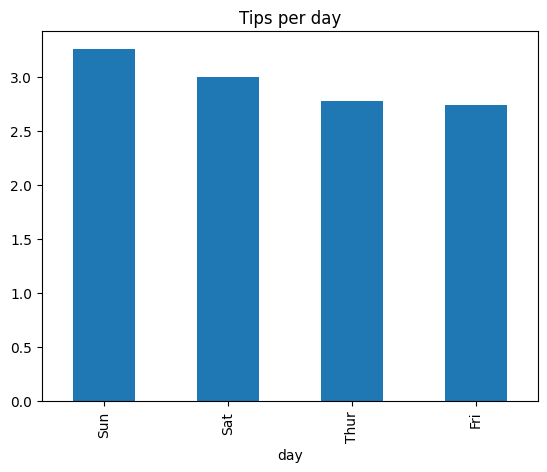

In [17]:
df.groupby('day')['tip'].mean().sort_values(ascending=False).plot(kind='bar',title='Tips per day')
plt.show()

We recieve the highest tip on sunday followed by saturday with friday being the lowest

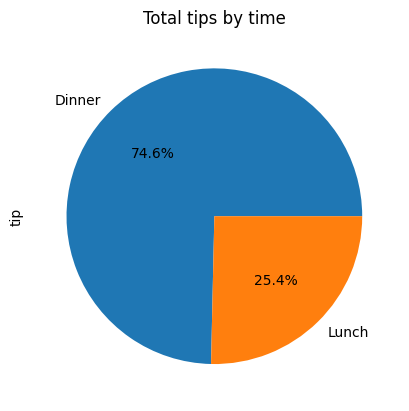

In [86]:
df.groupby('time')['tip'].sum().sort_values(ascending=False).plot(kind='pie',autopct='%1.1f%%',title='Total tips by time')
#plt.savefig('images/total_tip_by_time')
plt.show()

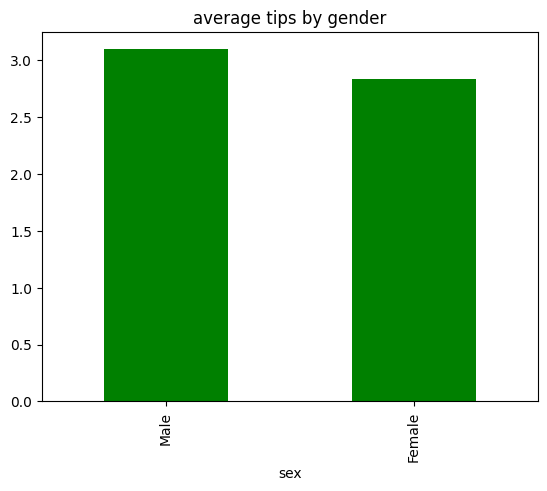

In [96]:
df.groupby('sex')['tip'].mean().sort_values(ascending=False).plot(kind='bar',color='green',title='average tips by gender')
# plt.savefig('avg_tip_gender')
plt.show()

Males tip more on average than female ;)

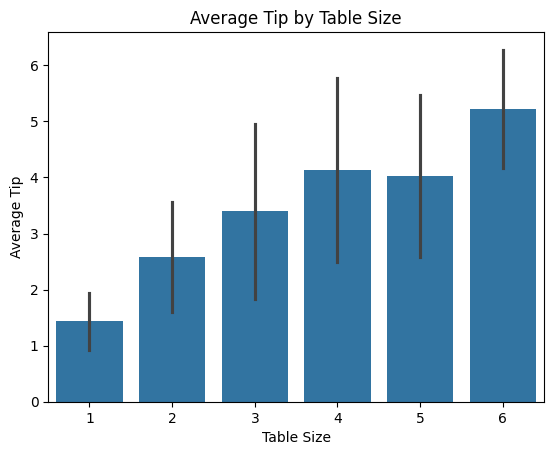

In [87]:
sns.barplot(x='size', y='tip', data=df, errorbar='sd')
plt.xlabel('Table Size')
plt.ylabel('Average Tip')
plt.title('Average Tip by Table Size')
# plt.savefig('images/Average_Tip_by_Table_Size')
plt.show()

table size 6 leads with high margin to the other table sizes

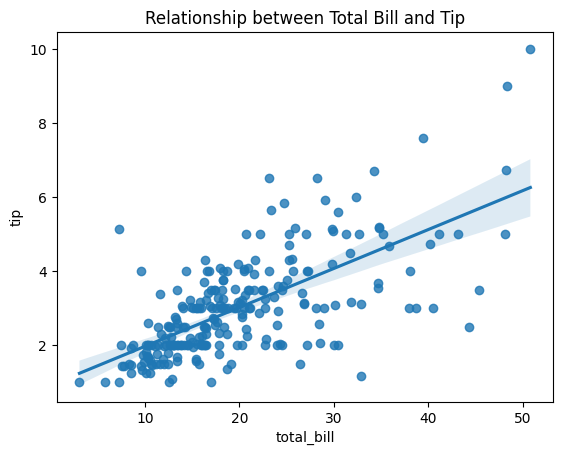

In [88]:
sns.regplot(x='total_bill',y='tip',data=df)
plt.title('Relationship between Total Bill and Tip')
# plt.savefig('images/relationship_total_bill_and_tip')
plt.show()

A positive linear relationship exists between tip and total bill

## Question (Round 2)

1. How does tip rate vary between lunch and dinner?
2. Which combinations yield the highest tips (e.g., male-smoker-dinner)?
3. Which day has the largest variation (spread) in tips?

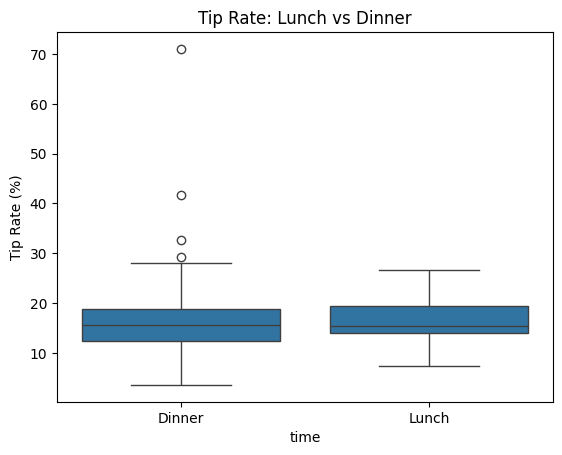

In [49]:
df['tip_rate'] = (df['tip'] / df['total_bill']) * 100
sns.boxplot(x='time', y='tip_rate',data=df)
plt.ylabel('Tip Rate (%)')
plt.title('Tip Rate: Lunch vs Dinner')
plt.show()

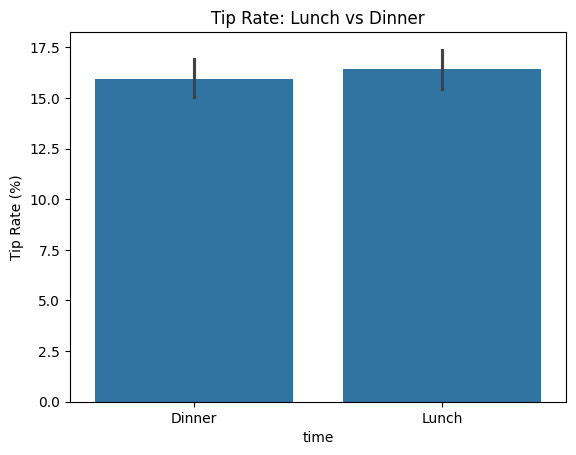

In [50]:
sns.barplot(x='time', y='tip_rate',data=df)
plt.ylabel('Tip Rate (%)')
plt.title('Tip Rate: Lunch vs Dinner')
plt.show()

almost similar but dinner tends to have higher tip rate on average

In [56]:
df.groupby(['sex','smoker','time'])['tip'] \
    .agg(['mean','count','sum']).sort_values('mean',ascending=False)

mean  count     sum
sex    smoker time                           
Male   No     Dinner  3.158052     77  243.17
       Yes    Dinner  3.123191     47  146.79
Female No     Dinner  3.044138     29   88.28
       Yes    Dinner  2.949130     23   67.83
Male   No     Lunch   2.941500     20   58.83
Female Yes    Lunch   2.891000     10   28.91
Male   Yes    Lunch   2.790769     13   36.28
Female No     Lunch   2.459600     25   61.49

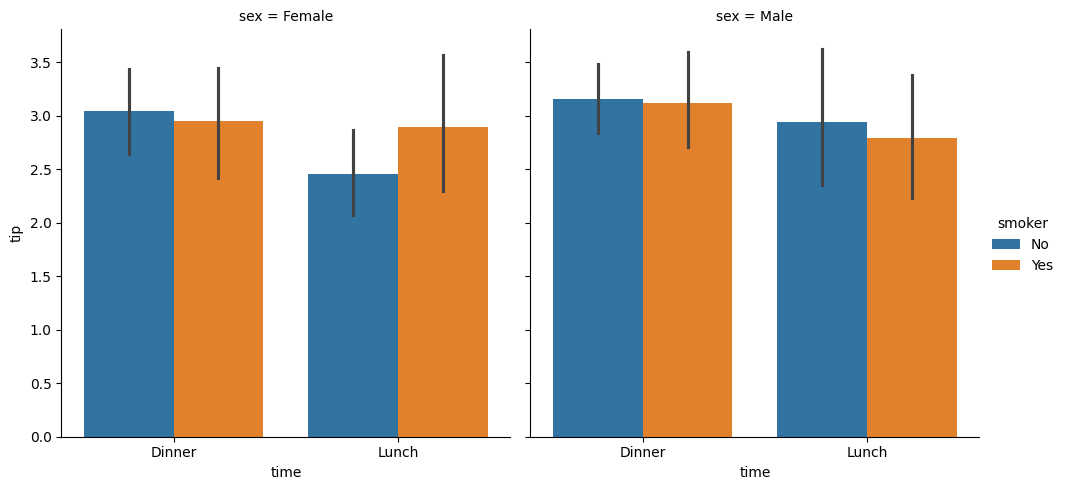

In [89]:
sns.catplot(x='time', y='tip', hue='smoker', col='sex', data=df, kind='bar')
# plt.savefig('images/highest_tips_combinations')
plt.show()

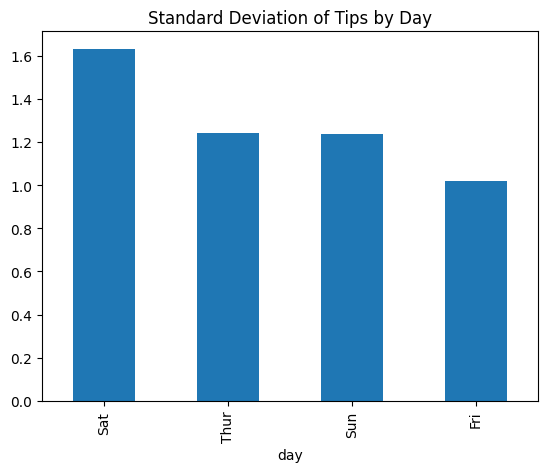

In [64]:
df.groupby('day')['tip'].std().sort_values(ascending=False).plot(kind='bar',title='Standard Deviation of Tips by Day')
plt.show()

## Questions (Round 3)
1. Build a tip prediction model – which features most strongly predict tip amount?

In [66]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
df_encoded.head()

,total_bill,tip,size,tip_rate,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,5.944673,False,False,False,True,False,False
1,10.34,1.66,3,16.054159,True,False,False,True,False,False
2,21.01,3.50,3,16.658734,True,False,False,True,False,False
3,23.68,3.31,2,13.978041,True,False,False,True,False,False
4,24.59,3.61,4,14.680765,False,False,False,True,False,False


In [78]:
# features and target
X = df_encoded.drop(['tip','tip_rate'],axis=1)
y = df_encoded['tip']

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [81]:
# Train random forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [82]:
# Predictions
y_pred = rf_model.predict(X_test)

In [85]:
# Evaluate
print("Model Performance:")
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"Mean Absolute Error: ${mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

Model Performance:
R² Score: 0.264
Mean Absolute Error: $0.76
RMSE: $0.96


In [84]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)
feature_importance

,feature,importance
0,total_bill,0.767043
3,smoker_Yes,0.069417
1,size,0.058045
4,day_Sat,0.030292
5,day_Sun,0.025223
2,sex_Male,0.025187
7,time_Lunch,0.012975
6,day_Thur,0.011818


model performed poorly :(